In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
# Load dataset
df = pd.read_csv("C:/Users/ky911/Downloads/loan_prediction.csv")

# Display the first few rows
print(df.head())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [5]:
# Exlporing the dataset

In [6]:
# Checking the structure of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [7]:
# Checking  for missing and null values
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [8]:
# Describing  the numerical columns
print(df.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [9]:
#Analyzing  Features and Target Variable

Loan_Status
Y    422
N    192
Name: count, dtype: int64


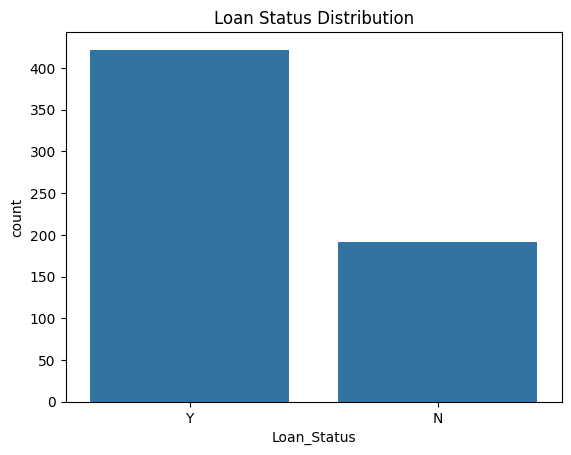

In [10]:
# Exploring the  target variable
print(df['Loan_Status'].value_counts())

# Plot distribution of Loan Status
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Status Distribution')
plt.show()


In [11]:
# handling the missing values from the dataset.

In [14]:
# dropping Loan_ID column entirely
data = df.drop('Loan_ID', axis=1)

In [15]:
# again checking the top 5  rows 
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
# making a list of columns with missing percentage < 5%

columns = ['Gender','Dependents','LoanAmount','Loan_Amount_Term']

In [17]:
# dropping rows and columns with missing percentage less than 5%

data = data.dropna(subset=columns) # as default axis=0 (meaning drop rows which contain missing values)

In [18]:
# checking missing percentage again

data.isnull().sum()*100 / len(data)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [19]:
# all the missing values are handled now .

In [20]:
# now Feature selection and splitting the data.

In [21]:
# Defined features and target
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Initializing  and training  the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


ValueError: could not convert string to float: 'LP001273'

In [23]:
# error occurs,lets solve it!
# Drop the Loan_ID column as it is not relevant for prediction
df.drop(columns=['Loan_ID'], inplace=True)


In [24]:
# Check data types again
print(df.dtypes)

# Ensure no non-numeric data remains
print(df.select_dtypes(include='object').columns)  # This should return an empty result


Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')


In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
binary_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']

for col in binary_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [26]:
# One-Hot Encoding for 'Dependents' and 'Property_Area'
df = pd.get_dummies(df, columns=['Dependents', 'Property_Area'], drop_first=True)


In [27]:
# Check the updated data types
print(df.dtypes)

# Ensure no object columns remain
print(df.select_dtypes(include='object').columns)  # Should return an empty result


Gender                       int64
Married                      int64
Education                    int64
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
Dependents_1                  bool
Dependents_2                  bool
Dependents_3+                 bool
Property_Area_Semiurban       bool
Property_Area_Urban           bool
dtype: object
Index([], dtype='object')


In [28]:
# Spliting  the data into features (X) and target (y)
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

# Spliting  the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training  the RandomForest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediction  and evaluation
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display detailed performance metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.86      0.44      0.58        43
           1       0.76      0.96      0.85        80

    accuracy                           0.78       123
   macro avg       0.81      0.70      0.72       123
weighted avg       0.80      0.78      0.76       123



In [29]:
importances = model.feature_importances_
feature_names = X.columns
for feature, importance in zip(feature_names, importances):
    print(f'{feature}: {importance:.4f}')


Gender: 0.0226
Married: 0.0276
Education: 0.0227
Self_Employed: 0.0202
ApplicantIncome: 0.1986
CoapplicantIncome: 0.1207
LoanAmount: 0.1877
Loan_Amount_Term: 0.0555
Credit_History: 0.2413
Dependents_1: 0.0215
Dependents_2: 0.0164
Dependents_3+: 0.0136
Property_Area_Semiurban: 0.0289
Property_Area_Urban: 0.0228


In [31]:
# Interpreting  the prediction
if prediction[0] == 1:
    print("Loan Approved")
else:
    print("Loan Not Approved")


Loan Approved
